In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [27]:
from preproc import *

## Use weights 

In [2]:
%%time 

from keras.models import model_from_json

json_decoder = ''
json_encoder = ''

with open('encoder_mri_json.txt', 'r') as file:
    json_encoder = file.readline()

with open('decoder_mri_json.txt', 'r') as file:
    json_decoder = file.readline()

D = model_from_json(json_decoder)
D.load_weights('decoder_weights_mri.h5')

E = model_from_json(json_encoder)
E.load_weights('encoder_weights_mri.h5')

CPU times: user 387 ms, sys: 9.25 ms, total: 396 ms
Wall time: 389 ms


## Input 

In [29]:
puten = cv2.imread('puten.jpg')

In [30]:
puten = crop_faces(puten)

In [5]:
gref1 = cv2.imread('gref_test.png')
ya = cv2.imread('data.jpg')
gref2 = cv2.imread('gref2.jpg')
gref3 = cv2.imread('gref3.jpg')

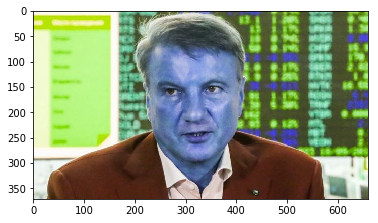

In [8]:
plt.imshow(gref3)

## Crop Faces

In [ ]:
gref1 = crop_faces(gref1)[0]
ya = crop_faces(ya)[0]
gref2 = crop_faces(gref2)[0]
gref3 = crop_faces(gref3)[0]

In [ ]:
gref1 = cv2.resize(gref1, (64, 64))
gref2 = cv2.resize(gref2, (64, 64))
ya = cv2.resize(ya, (64, 64))
gref3 = cv2.resize(gref3, (64, 64))
 
gref1 = np.expand_dims(gref1,0)
gref1 = np.expand_dims(gref1,-1)

gref2 = np.expand_dims(gref2,0)
gref2 = np.expand_dims(gref2,-1)

ya = np.expand_dims(ya,0)
ya = np.expand_dims(ya,-1)

gref3 = np.expand_dims(gref3,0)
gref3 = np.expand_dims(gref3,-1)

gref1 = gref1 / 255.
gref2 = gref2 / 255.
gref3 = gref3 / 255.
ya = ya / 255.

In [21]:
puten = np.asarray(puten)

In [26]:
E.predict(puten)

ValueError: Error when checking input: expected input_1 to have 4 dimensions, but got array with shape (2, 1)

In [ ]:
gref1_pred = E.predict(gref1) # 3, 128
ya_pred = E.predict(ya) # 1, 128
gref2_pred = E.predict(gref2) # 3, 128
gref3_pred = E.predict(gref3)

In [ ]:
distance(gref1_pred,gref2_pred)

In [ ]:
distance(gref1_pred,ya_pred)

In [ ]:
distance(gref2_pred,ya_pred)

In [ ]:
distance(gref3_pred,gref2_pred)

In [ ]:
distance(gref3_pred,gref1_pred)

In [ ]:
distance(gref3_pred,ya_pred)